In [ ]:
!pip install transformers datasets evaluate accelerate
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7

In [ ]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

<ipython-input-3-a6dd9d52ad4a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


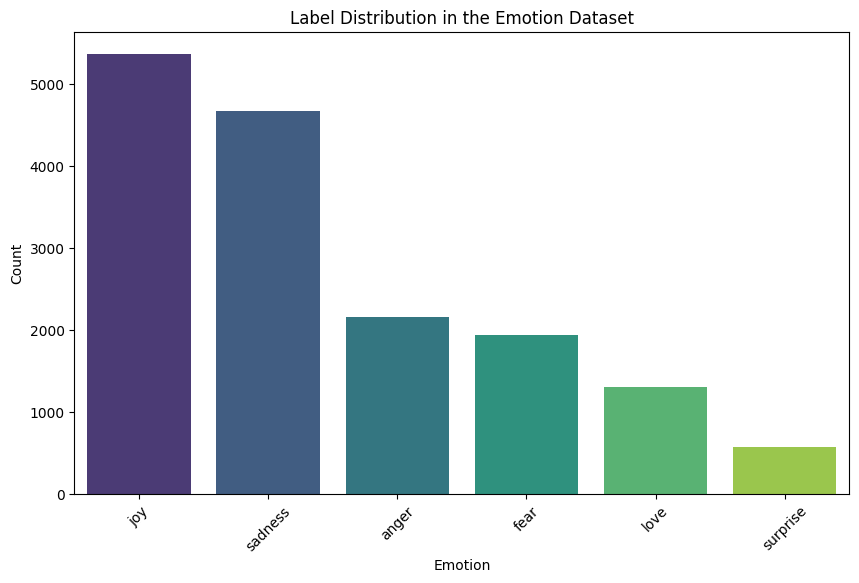

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

id2label={
  0: 'sadness',
  1: 'joy',
  2: 'love',
  3: 'anger',
  4: 'fear',
  5: 'surprise',
}
label2id={
  'sadness': 0,
  'joy': 1,
  'love': 2,
  'anger': 3,
  'fear': 4,
  'surprise': 5,
}

label2id = {v: k for k, v in id2label.items()}

for split in dataset:
    dataset[split] = dataset[split].map(lambda x: {'label_name': id2label[x['label']]})

label_counts = dataset['train'].to_pandas()['label_name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Distribution in the Emotion Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.savefig("/content/distrubution.png",dpi = 300)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


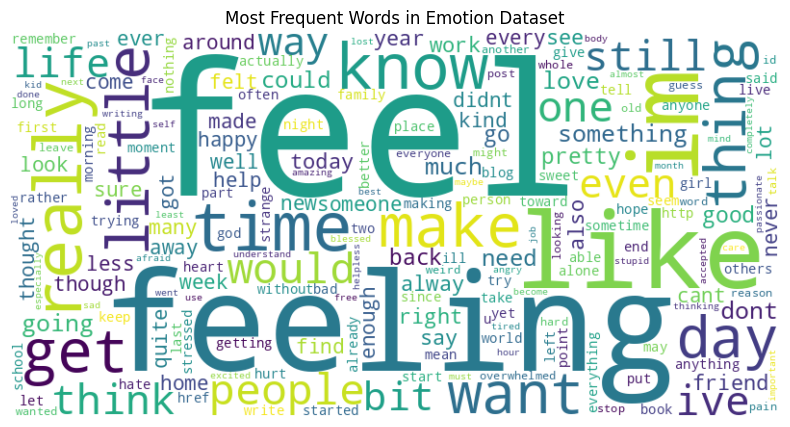

In [ ]:
from wordcloud import WordCloud
from datasets import load_dataset
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk

text_data = dataset['train']['text']
nltk.download('stopwords')

def clean_text(text):
    return ''.join([char.lower() for char in text if char.isalnum() or char.isspace()])

cleaned_texts = [clean_text(text) for text in text_data]

combined_text = ' '.join(cleaned_texts)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(stopwords.words('english')),
    collocations=False
).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Emotion Dataset')
plt.savefig("/content/MostFrequentWords.png",dpi = 300)
plt.show()

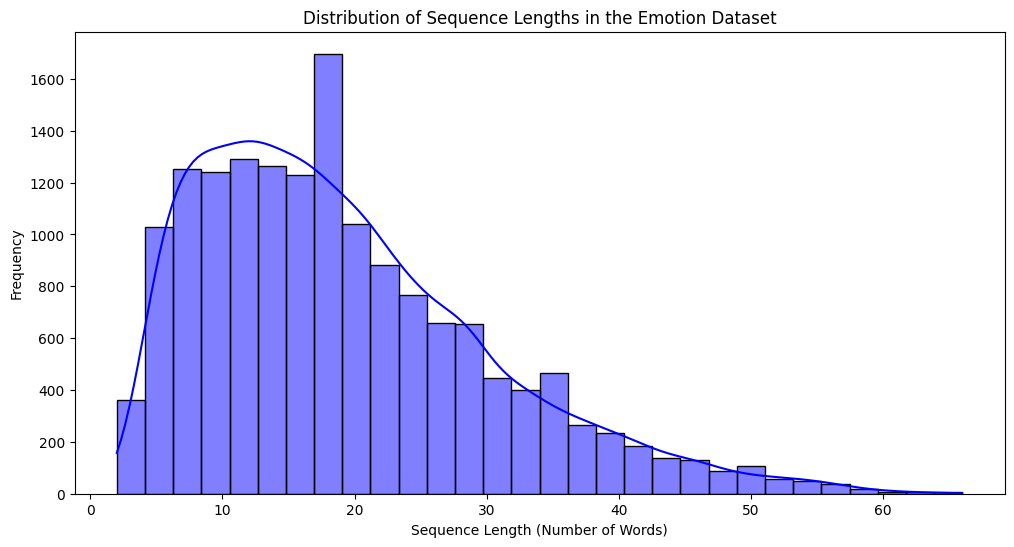

In [ ]:
sequence_lengths = [len(text.split()) for text in dataset['train']['text']]

plt.figure(figsize=(12, 6))
sns.histplot(sequence_lengths, bins=30, kde=True, color='blue')
plt.title('Distribution of Sequence Lengths in the Emotion Dataset')
plt.xlabel('Sequence Length (Number of Words)')
plt.ylabel('Frequency')
plt.savefig("/content/Sequence_Length.png",dpi = 300)
plt.show()

In [ ]:
all_text = ' '.join(dataset['train']['text'])

stop_words = set(stopwords.words('english'))
words = [word for word in all_text.split() if word.lower() not in stop_words]

word_counts = Counter(words)

top_5_most_common = word_counts.most_common(5)

least_common_words = [word for word, count in word_counts.items() if count == 1]
top_5_least_common = least_common_words[:5]

print("\n top_5_most_common :\n ")
print(top_5_most_common)
print("\n top_5_least_common :\n")
print(top_5_least_common)


 top_5_most_common :
 
[('feel', 11183), ('feeling', 5112), ('like', 2908), ('im', 2430), ('really', 942)]

 top_5_least_common :

['milligrams', 'recommended', 'proto', 'sixties', 'strategies']


In [ ]:
!pip install transformers datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 

In [ ]:

which_model = "google-bert/bert-base-uncased"
name = "bert-base-uncased_lr1"

id2label={
  0: 'sadness',
  1: 'joy',
  2: 'love',
  3: 'anger',
  4: 'fear',
  5: 'surprise',
}
label2id={
  'sadness': 0,
  'joy': 1,
  'love': 2,
  'anger': 3,
  'fear': 4,
  'surprise': 5,
}

In [ ]:
import re
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

def preprocess_function(examples):
    return   tokenizer(examples["text"])

tokenizer = AutoTokenizer.from_pretrained(which_model)

tokenized_dataset = dataset.map(preprocess_function)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model = AutoModelForSequenceClassification.from_pretrained(
    which_model, num_labels=6,id2label=id2label, label2id=label2id
)


training_args = TrainingArguments(
    output_dir=name,
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    auto_find_batch_size=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

mkdir: cannot create directory ‘/content/results’: File exists


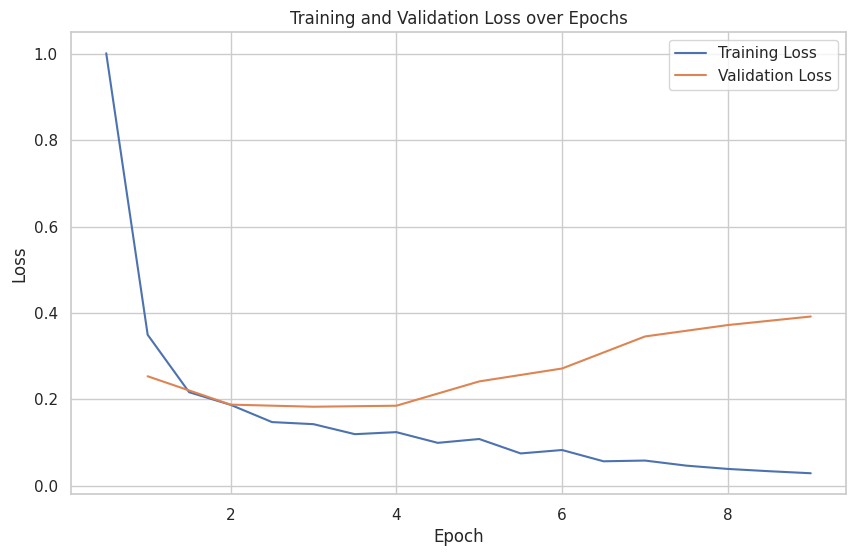

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
!mkdir /content/results
!mkdir /content/results/{name}
import json
import matplotlib.pyplot as plt

trainer_state_path = f'/content/{name}/checkpoint-9000/trainer_state.json'
with open(trainer_state_path, 'r') as file:
    trainer_state = json.load(file)

train_losses = []
val_losses = []
epochs = []
epochs_val = []

for log_entry in trainer_state['log_history']:

    if 'loss' in log_entry:
        train_losses.append(log_entry['loss'])
        epochs.append(log_entry['epoch'])
    if 'eval_loss' in log_entry:
        val_losses.append(log_entry['eval_loss'])
        epochs_val.append(log_entry['epoch'])

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss')
if val_losses:
    plt.plot(epochs_val, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.savefig(f"/content/results/{name}/loss.png",dpi =300)
plt.show()


In [ ]:
import pandas as pd
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  avg_f1_score = f1.compute(predictions=predictions, references=labels, average="micro")["f1"]

  f1_score = f1.compute(predictions=predictions, references=labels, average=None)["f1"]
  precision_score = precision.compute(predictions=predictions, references=labels, average=None)["precision"]
  recall_score = recall.compute(predictions=predictions, references=labels, average=None)["recall"]
  accuracy_score=accuracy.compute(predictions=predictions, references=labels)
  return {
      "f1": f1_score,
      "avg_f1_score":avg_f1_score,
      "precision": precision_score,
      "recall": recall_score,
      "accuracy":accuracy_score
  }

training_args = TrainingArguments(
    per_device_eval_batch_size=64,
    output_dir=".\results_hf",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
)

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    eval_dataset=tokenized_dataset["test"],
)

print(f"\n {name} : \n ")
metrics = trainer.evaluate()

id2label = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'}

print("\n f1_scores : \n")
f1_scores = metrics["eval_f1"]
for label,i in zip(id2label.values(),id2label.keys()):
  print(f"{label} : {f1_scores[i]}")

print("\n precision_scores : \n")
precision_scores = metrics["eval_precision"]
for label,i in zip(id2label.values(),id2label.keys()):
  print(f"{label} : {precision_scores[i]}")

print("\n recall_scores : \n")
recall_scores = metrics["eval_recall"]
for label,i in zip(id2label.values(),id2label.keys()):
  print(f"{label} : {recall_scores[i]}")

print("\n accuracy_score : \n ")
accuracy_score = metrics["eval_accuracy"]
print(f"\n Total Accuracay {accuracy_score}: \n")
accuracy_score = metrics["eval_accuracy"]["accuracy"]
avg_f1_score = metrics["eval_avg_f1_score"]

results = {
    'Class': list(id2label.values()),
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
}

df = pd.DataFrame(results)

df.loc[len(df)] = ['Overall', '', '', '']
df.loc[len(df)] = ['Accuracy', accuracy_score, '', '']
df.loc[len(df)] = ['Average F1 Score', avg_f1_score, '', '']

excel_file = f'/content/results/{name}/evaluation_results.xlsx'
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"Results saved to {excel_file}")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(



 electra-base_lr2 : 
 


Trainer is attempting to log a value of "[0.97094017 0.95473833 0.81850534 0.92592593 0.88646288 0.75912409]" of type <class 'numpy.ndarray'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.96434635 0.93880389 0.94262295 0.94339623 0.86752137 0.73239437]" of type <class 'numpy.ndarray'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.97762478 0.97122302 0.72327044 0.90909091 0.90625    0.78787879]" of type <class 'numpy.ndarray'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9315}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is inc


 f1_scores : 

sadness : 0.9709401709401709
joy : 0.9547383309759547
love : 0.8185053380782918
anger : 0.9259259259259259
fear : 0.8864628820960699
surprise : 0.7591240875912407

 precision_scores : 

sadness : 0.9643463497453311
joy : 0.9388038942976356
love : 0.9426229508196722
anger : 0.9433962264150944
fear : 0.8675213675213675
surprise : 0.7323943661971831

 recall_scores : 

sadness : 0.9776247848537005
joy : 0.9712230215827338
love : 0.7232704402515723
anger : 0.9090909090909091
fear : 0.90625
surprise : 0.7878787878787878

 accuracy_score : 
 

 Total Accuracay {'accuracy': 0.9315}: 

Results saved to /content/results/electra-base_lr2/evaluation_results.xlsx


<ipython-input-18-174b856cfe41>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='F1 Score', data=df, palette='Blues_d')


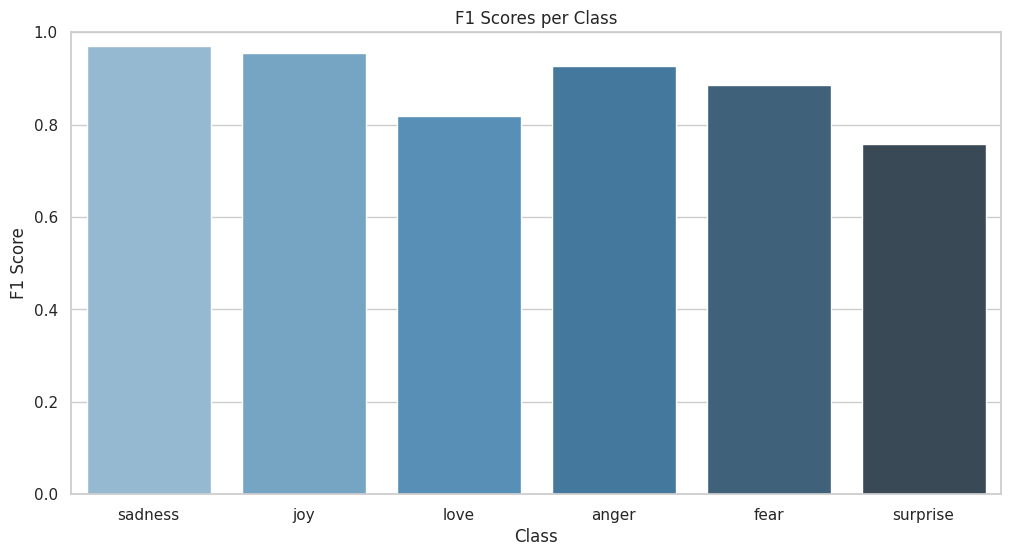

<ipython-input-18-174b856cfe41>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Precision', data=df, palette='Greens_d')


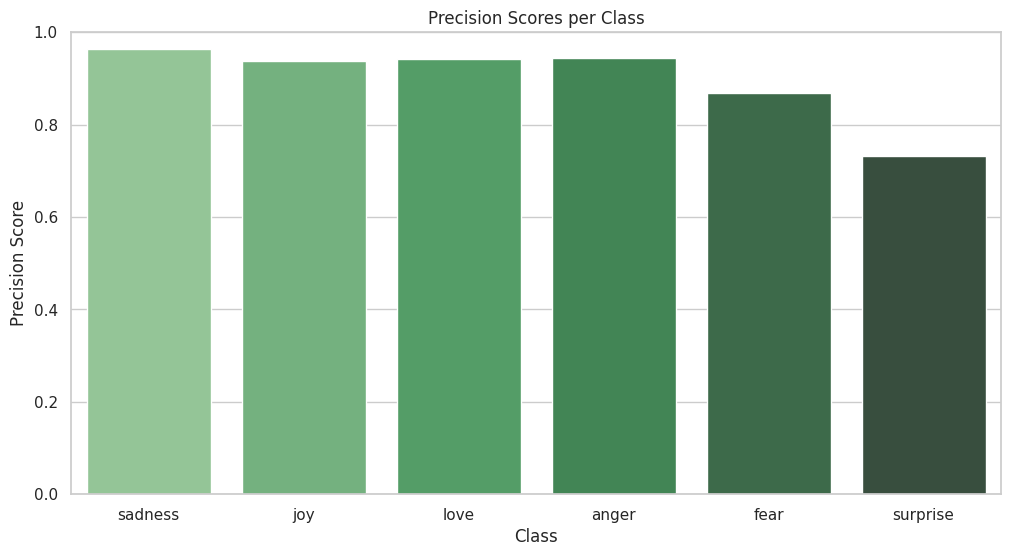

<ipython-input-18-174b856cfe41>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Recall', data=df, palette='Reds_d')


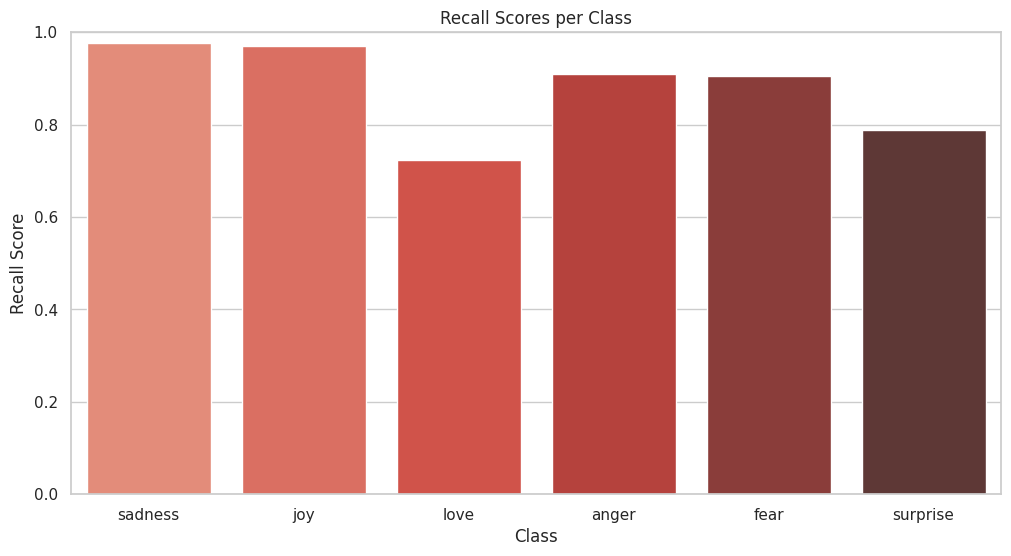

In [ ]:
id2label = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

classes = list(id2label.values())
metric_data = {
    'Class': classes,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
}

df = pd.DataFrame(metric_data)
sns.set(style="whitegrid")

# Plot F1 scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='F1 Score', data=df, palette='Blues_d')
plt.title('F1 Scores per Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.savefig(f"/content/results/{name}/F1.png",dpi =300)
plt.show()

# Plot Precision scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Precision', data=df, palette='Greens_d')
plt.title('Precision Scores per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.savefig(f"/content/results/{name}/Precision.png",dpi =300)
plt.show()

# Plot Recall scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Recall', data=df, palette='Reds_d')
plt.title('Recall Scores per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.ylim(0, 1)
plt.savefig(f"/content/results/{name}/recall.png",dpi =300)
plt.show()



In [ ]:
!zip -r /content/results.zip /content/results

updating: content/results/ (stored 0%)
updating: content/results/bert-base-uncased_lr2/ (stored 0%)
updating: content/results/bert-base-uncased_lr2/Precision.png (deflated 37%)
updating: content/results/bert-base-uncased_lr2/evaluation_results.xlsx (deflated 10%)
updating: content/results/bert-base-uncased_lr2/F1.png (deflated 40%)
updating: content/results/bert-base-uncased_lr2/recall.png (deflated 38%)
updating: content/results/bert-base-uncased_lr2/loss.png (deflated 20%)
updating: content/results/distilbert-base-uncased_lr2/ (stored 0%)
updating: content/results/distilbert-base-uncased_lr2/Precision.png (deflated 36%)
updating: content/results/distilbert-base-uncased_lr2/evaluation_results.xlsx (deflated 10%)
updating: content/results/distilbert-base-uncased_lr2/F1.png (deflated 40%)
updating: content/results/distilbert-base-uncased_lr2/recall.png (deflated 38%)
updating: content/results/distilbert-base-uncased_lr2/loss.png (deflated 20%)
  adding: content/results/electra-base_lr2/